In [2]:
from core import CausalFactory
import pandas as pd

2024-11-30 16:48:39,759 - c:\personal\coding\causal-factory\local_venv\Lib\site-packages\castle\backend\__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2024-11-30 16:48:39,876 - c:\personal\coding\causal-factory\local_venv\Lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [3]:
data=pd.read_csv("data/dataset.csv")
data.head()

,U0,U1,U2,U3,U4,U5,U6
0,-0.083224,2.387427,1.460524,1.971073,0.218520,0.865877,0.199954
1,0.690312,4.924978,4.586578,4.055415,0.172857,4.092845,1.081922
2,0.837289,1.679108,0.922493,1.373564,-2.263137,-1.268165,1.166444
3,0.268892,-0.786437,-0.456814,-1.017827,-0.127997,-2.440277,-0.443029
4,-0.582213,-2.742535,-1.620262,-1.435135,-0.008020,-0.703239,-1.646426


In [5]:
cf = CausalFactory(mode="create",
                algorithm="PC",
                algorithm_params={"variant":'original',
                                "alpha":0.9,
                                "ci_test":'fisherz'
                                },
                max_features=10                  
            )

2024-11-30 16:48:43 - INFO: CausalFactory initialized in 'create' mode.


In [7]:
causal_matrix=cf.discover_causal_graph(data)
causal_matrix

2024-11-30 16:48:45 - INFO: Discovering causal graph using 'PC' algorithm.
2024-11-30 16:48:45 - INFO: Causal graph discovery complete.


,U0,U1,U2,U3,U4,U5,U6
U0,0,0,1,1,0,1,0
U1,0,0,1,0,0,1,0
U2,0,0,0,0,0,0,0
U3,1,0,0,0,1,1,0
U4,0,0,1,0,0,1,0
U5,0,0,0,0,0,0,0
U6,0,1,1,0,1,0,0


Hint: for better visibility, adjust layout parameters (e.g., layout_seed), supported layouts: ['spring', 'random']


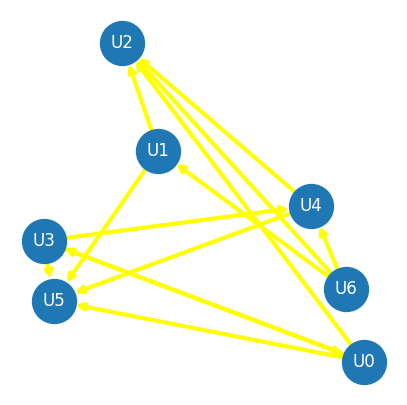

In [8]:
cf.plot_causal_graph(causal_matrix_dataframe=causal_matrix, layout="random", layout_seed=51)

In [9]:
cf.log_causal_model()

2024-11-30 16:48:47 - INFO: Logging causal model to 'mlflow_server'.
2024-11-30 16:48:47 - INFO: Inferring model signature with max_features=10.
2024-11-30 16:48:47 - INFO: Temporary model file 'PC_causal_model.py' created successfully.
2024-11-30 16:48:47 - INFO: No experiment name provided. Defaulting to 'causal_matrix_PC'.
2024-11-30 16:48:48 - INFO: Logging model artifacts.
Registered model 'PC_model' already exists. Creating a new version of this model...
Created version '38' of model 'PC_model'.
c:\personal\coding\causal-factory\local_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-30 16:48:54 - INFO: Causal model logged successfully. Info: <mlflow.models.model.ModelInfo object at 0x000001CF4D2F4DD0>
2024-11-30 16:48:54 - INFO: Temporary file 'PC_causal_model.py' deleted successfully.


### Prediction

In [11]:
cf_predict=CausalFactory(mode="infer")

2024-11-30 16:49:23 - INFO: CausalFactory initialized in 'infer' mode.


In [ ]:
logged_model = 'runs:/9fb8caa608324ef385c631d785d8408b/model'
# Load model as a PyFuncModel.
cf_predict.load_causal_model(logged_model)
print(cf_predict.model_metadata)

2024-11-30 16:49:41 - INFO: Loading causal model from 'runs:/9fb8caa608324ef385c631d785d8408b/model'.
2024-11-30 16:49:41 - INFO: Causal model loaded successfully: 


{'algorithm': 'PC', 'params': {'variant': 'original', 'alpha': 0.9, 'ci_test': 'fisherz'}, 'max_features': 10}


In [13]:
data=pd.read_csv("data/dataset.csv")
data.head()

,U0,U1,U2,U3,U4,U5,U6
0,-0.083224,2.387427,1.460524,1.971073,0.218520,0.865877,0.199954
1,0.690312,4.924978,4.586578,4.055415,0.172857,4.092845,1.081922
2,0.837289,1.679108,0.922493,1.373564,-2.263137,-1.268165,1.166444
3,0.268892,-0.786437,-0.456814,-1.017827,-0.127997,-2.440277,-0.443029
4,-0.582213,-2.742535,-1.620262,-1.435135,-0.008020,-0.703239,-1.646426


In [14]:
predicted_causal_matrix=cf_predict.infer_causal_model(pd.DataFrame(data.iloc[:,2:4]))
predicted_causal_matrix

2024-11-30 16:49:44 - INFO: Data schema extracted: ['U2', 'U3']
2024-11-30 16:49:44 - INFO: Schema mapped for causal model inference.


,U2,U3
U2,0,1
U3,1,0


Hint: for better visibility, adjust layout parameters (e.g., layout_seed), supported layouts: ['spring', 'random']


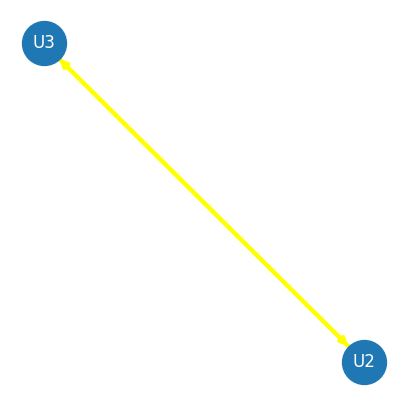

In [16]:
cf_predict.plot_causal_graph(causal_matrix_dataframe=predicted_causal_matrix, 
                     layout="random", 
                     layout_seed=51)